In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-dataset/Car Sell Dataset.csv


In [2]:
data = pd.read_csv('/kaggle/input/car-dataset/Car Sell Dataset.csv')
print(data.head())

           Brand Model Name Model Variant   Car Type Transmission Fuel Type  \
0       Mahindra     TUV300           AX5        SUV       Manual       CNG   
1          Skoda      Rapid         Style      Sedan       Manual    Petrol   
2  Maruti Suzuki       Alto             Z  Hatchback       Manual    Diesel   
3        Hyundai  Grand i10         Magna  Hatchback       Manual    Diesel   
4       Mahindra     XUV500            W8        SUV       Manual    Petrol   

   Year  Kilometers Owner           State Accidental   Price  
0  2017      164654   1st       Rajasthan         No  547253  
1  2018       41351   1st     Maharashtra         No  512050  
2  2002      119090  3rd+      Tamil Nadu         No  678923  
3  2013       19979   1st  Andhra Pradesh         No  522500  
4  2011      130591  3rd+           Bihar         No  401182  


In [3]:
print(data.shape)

(140904, 12)


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140904 entries, 0 to 140903
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Brand          140904 non-null  object
 1   Model Name     140904 non-null  object
 2   Model Variant  140904 non-null  object
 3   Car Type       140904 non-null  object
 4   Transmission   140904 non-null  object
 5   Fuel Type      140904 non-null  object
 6   Year           140904 non-null  int64 
 7   Kilometers     140904 non-null  int64 
 8   Owner          140904 non-null  object
 9   State          140904 non-null  object
 10  Accidental     140904 non-null  object
 11  Price          140904 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 12.9+ MB
None


Unique Values

In [5]:
for column in data.columns:
    print('Number of unique data for{0} is {1}'.format(column, len(data[column].unique())))
    print('unique data for {0} is{1}'. format(column, data[column].unique()))
    print('=================================')

Number of unique data forBrand is 18
unique data for Brand is['Mahindra' 'Skoda' 'Maruti Suzuki' 'Hyundai' 'MG' 'Audi' 'Toyota' 'Honda'
 'Tata' 'Ford' 'Chevrolet' 'BMW' 'Volkswagen' 'Jaguar' 'Renault' 'Kia'
 'Range Rover' 'Nissan']
Number of unique data forModel Name is 84
unique data for Model Name is['TUV300' 'Rapid' 'Alto' 'Grand i10' 'XUV500' 'Dzire' 'Hector' 'Baleno'
 'Ignis' 'Swift' 'Ertiga' 'A6' 'Urban Cruiser' 'City' 'Verna' 'Celerio'
 'Jazz' 'Brio' 'Harrier' 'Venue' 'Aspire' 'Tavera' 'Innova' 'Altroz'
 'WagonR' 'Aura' 'Creta' 'Figo' '5 Series' 'Ameo' 'XE' 'Nexon' 'Vento'
 'Kwid' 'i20' 'WR-V' 'Tiago' 'Kiger' 'EcoSport' 'Sonet' 'Tigor' 'S-Presso'
 'Bolero' 'Endeavour' 'Beat' 'Amaze' 'Taigun' 'Glanza' 'Seltos' 'Fortuner'
 'Thar' 'Polo' 'Q7' 'Superb' 'X3' 'Evoque' 'A4' 'Triber' 'i10' 'Slavia'
 'Etios' 'F-Pace' 'ZS EV' 'Scorpio' 'Cruze' 'Carens' 'Terrano' 'Astor'
 'Duster' 'Sunny' 'Kushaq' 'Octavia' 'Micra' '3 Series' 'Velar' 'X1'
 'Magnite' 'Discovery Sport' 'XF' 'Sail' 'Q5' 'Q3' 

In [6]:
data.drop(['Model Name', 'Model Variant', 'Car Type', 'Transmission', 'State'], axis=1, inplace=True)

In [7]:
print(data.head())

           Brand Fuel Type  Year  Kilometers Owner Accidental   Price
0       Mahindra       CNG  2017      164654   1st         No  547253
1          Skoda    Petrol  2018       41351   1st         No  512050
2  Maruti Suzuki    Diesel  2002      119090  3rd+         No  678923
3        Hyundai    Diesel  2013       19979   1st         No  522500
4       Mahindra    Petrol  2011      130591  3rd+         No  401182


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [9]:
#we build a function that we'll know the relationship and correlation between feature and each other
def make_pie(feature) : 
    plt.pie(data[feature].value_counts(),labels=list(data[feature].value_counts().index),
        autopct ='%1.4f%%' , labeldistance = 1,explode = [0.05 for i in range(len(data[feature].value_counts()))] )
    plt.show()

In [10]:
def make_countplot(feature) :
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("prism", 3)) 

In [11]:
def divide_feature(feature,n):
    return round((data[feature]- data[feature].min())/n)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
def make_label_encoder(original_feature , unoriginal_feature) : 
    enc  = LabelEncoder()
    enc.fit(data[original_feature])
    data[unoriginal_feature] = enc.transform(data[original_feature])
    data.drop([original_feature],axis=1, inplace=True)

In [14]:
def make_report() : 
    print(classification_report(y_test,y_pred))
    print('************************************')
    CM = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix is : \n', CM)
    print('************************************')
    sns.heatmap(CM, center = True)
    plt.show()

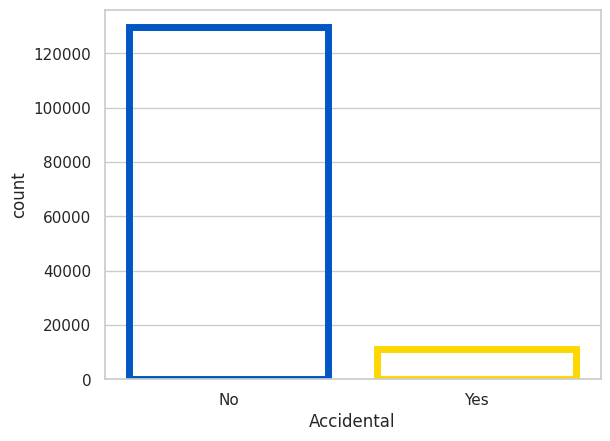

In [15]:
#Data correlation
make_countplot("Accidental")

In [16]:
#we move kilometers features, how many unique values it contain?
len(data['Kilometers'].unique())

95860

In [17]:
#95860 is a big number, which will not enable us to plot, we need to divide into segmentation
data['temp'] = divide_feature('Kilometers', 100)
print(data.head())

           Brand Fuel Type  Year  Kilometers Owner Accidental   Price    temp
0       Mahindra       CNG  2017      164654   1st         No  547253  1547.0
1          Skoda    Petrol  2018       41351   1st         No  512050   314.0
2  Maruti Suzuki    Diesel  2002      119090  3rd+         No  678923  1091.0
3        Hyundai    Diesel  2013       19979   1st         No  522500   100.0
4       Mahindra    Petrol  2011      130591  3rd+         No  401182  1206.0


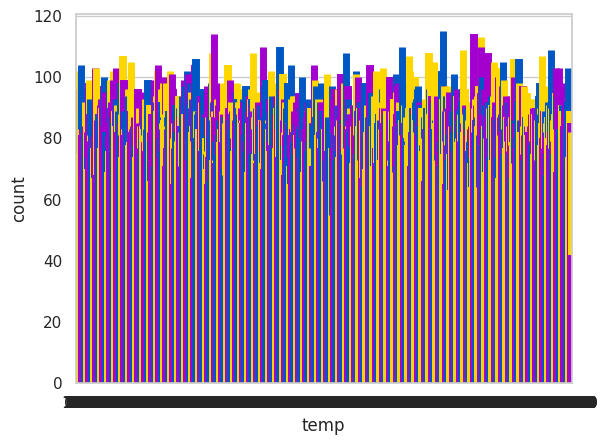

In [18]:
#Disply the countplot for each segmentation
make_countplot('temp')

It's very unpredictable. It's impossible to know in advance what will happen.

In [19]:
#We will not use it in training
data.drop(['temp'], axis=1, inplace=True)

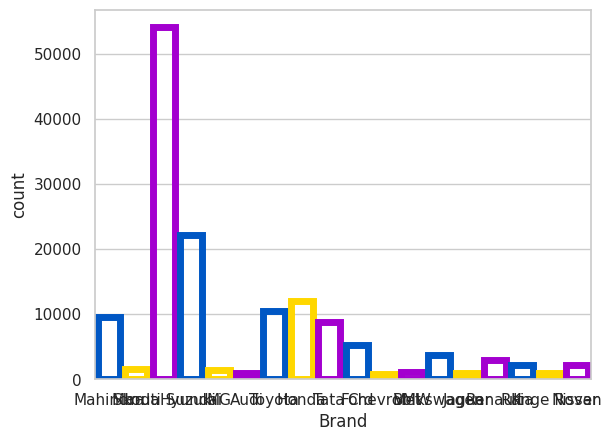

In [20]:
#We keep an eye on "brand"
make_countplot('Brand')

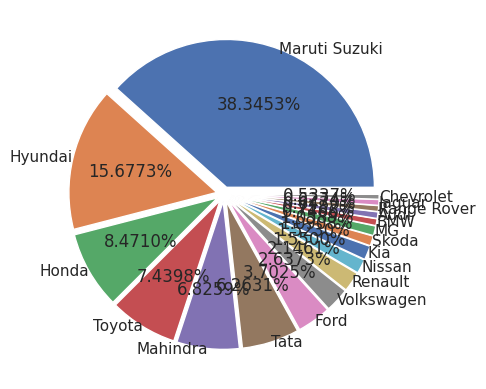

In [21]:
#"There is a strong demand for Maruti Suzuki
make_pie('Brand')

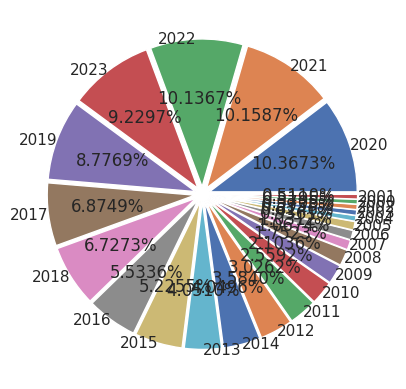

In [22]:
#we will see the year of production
make_pie('Year')

In [23]:
len(data['Price'].unique())

17745

it's a big amount of unique values, we have to divide it

In [24]:
data['temp'] = divide_feature('Price',10000)
print('Number of Sectors are {}'.format(len(data['temp'].unique())))

Number of Sectors are 248


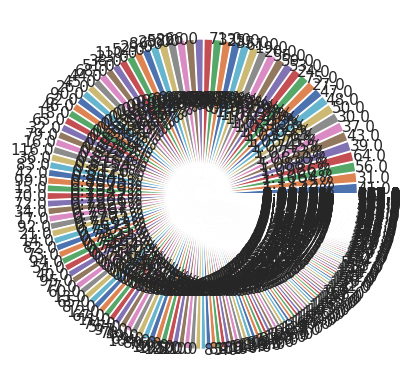

In [25]:
make_pie('temp')

This graph is difficult to understand, very confusing. (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. 

In [26]:
def make_kdeplot(feature) : 
    sns.kdeplot(data[feature], shade=True)

/tmp/ipykernel_13/4091367487.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


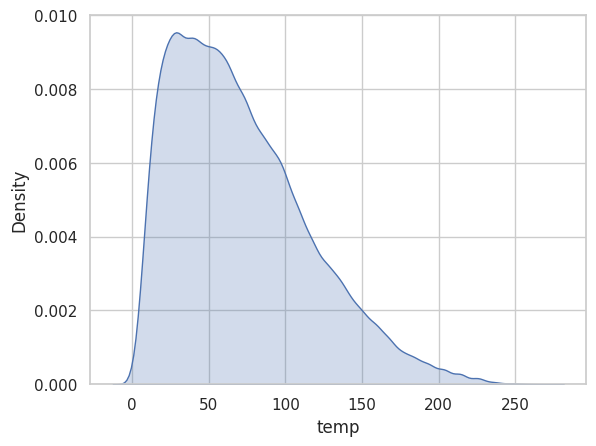

In [27]:
make_kdeplot('temp')

In [28]:
print(data.head())

           Brand Fuel Type  Year  Kilometers Owner Accidental   Price  temp
0       Mahindra       CNG  2017      164654   1st         No  547253  50.0
1          Skoda    Petrol  2018       41351   1st         No  512050  46.0
2  Maruti Suzuki    Diesel  2002      119090  3rd+         No  678923  63.0
3        Hyundai    Diesel  2013       19979   1st         No  522500  47.0
4       Mahindra    Petrol  2011      130591  3rd+         No  401182  35.0


In [29]:
print(data.columns)

Index(['Brand', 'Fuel Type', 'Year', 'Kilometers', 'Owner', 'Accidental',
       'Price', 'temp'],
      dtype='object')


In [30]:
print(data.head())

           Brand Fuel Type  Year  Kilometers Owner Accidental   Price  temp
0       Mahindra       CNG  2017      164654   1st         No  547253  50.0
1          Skoda    Petrol  2018       41351   1st         No  512050  46.0
2  Maruti Suzuki    Diesel  2002      119090  3rd+         No  678923  63.0
3        Hyundai    Diesel  2013       19979   1st         No  522500  47.0
4       Mahindra    Petrol  2011      130591  3rd+         No  401182  35.0


In [31]:
#labeling Accidental
make_label_encoder('Accidental', 'Accident')
print(data.head())

           Brand Fuel Type  Year  Kilometers Owner   Price  temp  Accident
0       Mahindra       CNG  2017      164654   1st  547253  50.0         0
1          Skoda    Petrol  2018       41351   1st  512050  46.0         0
2  Maruti Suzuki    Diesel  2002      119090  3rd+  678923  63.0         0
3        Hyundai    Diesel  2013       19979   1st  522500  47.0         0
4       Mahindra    Petrol  2011      130591  3rd+  401182  35.0         0
